In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

In [2]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.6 MB 8.2 kB/s 


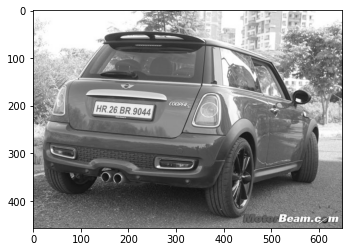

In [9]:
img=cv2.imread("/image1.jpeg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))
plt.show()

### apply filter and find edges for localization

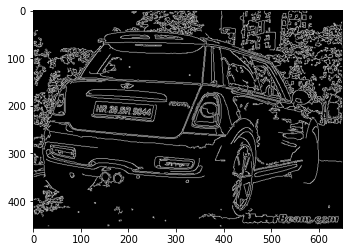

In [10]:
bfilter=cv2.bilateralFilter(gray,11,17,17) #noise reduction
edged=cv2.Canny(bfilter,30,200) # edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))
plt.show()

### find contours and apply mask

In [11]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [12]:
contours

[array([[[139,  60]],
 
        [[138,  61]],
 
        [[137,  61]],
 
        ...,
 
        [[146,  60]],
 
        [[145,  61]],
 
        [[144,  60]]], dtype=int32), array([[[ 89, 142]],
 
        [[ 90, 141]],
 
        [[ 92, 141]],
 
        [[ 94, 143]],
 
        [[ 94, 145]],
 
        [[ 93, 146]],
 
        [[ 91, 146]],
 
        [[ 93, 146]],
 
        [[ 94, 145]],
 
        [[ 95, 146]],
 
        [[108, 146]],
 
        [[109, 145]],
 
        [[137, 145]],
 
        [[138, 146]],
 
        [[157, 146]],
 
        [[158, 147]],
 
        [[176, 147]],
 
        [[177, 148]],
 
        [[195, 148]],
 
        [[196, 149]],
 
        [[216, 149]],
 
        [[217, 150]],
 
        [[236, 150]],
 
        [[237, 151]],
 
        [[255, 151]],
 
        [[256, 152]],
 
        [[275, 152]],
 
        [[276, 153]],
 
        [[294, 153]],
 
        [[295, 154]],
 
        [[314, 154]],
 
        [[315, 155]],
 
        [[330, 155]],
 
        [[331, 156]],
 
        [[345

In [13]:
location=None
for cnt in contours:
    approx=cv2.approxPolyDP(cnt,10,True)
    if len(approx)==4:
        location=approx
        break

In [14]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [15]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
IMAGE=cv2.bitwise_and(img,img,mask=mask)

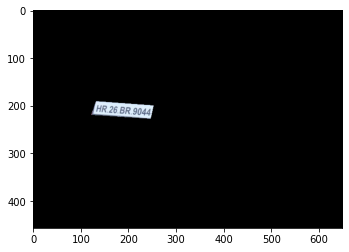

In [16]:
plt.imshow(cv2.cvtColor(IMAGE,cv2.COLOR_BGR2RGB))

In [17]:
(x,y)=np.where(mask==255)

In [18]:
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))

In [19]:
cropped_image=gray[x1:x2,y1:y2]

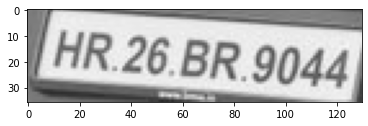

In [20]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))
plt.show()

### Use Easy OCR To Read Text

In [21]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5823536972076699)]